# Labor del Péndulo 

por: Juan Manuel Calvo Duque - Lina Marcela García Palacio

**Planteamiento del Problema:**


In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
import pandas as pd

C:\Users\juanm\AppData\Local\Temp\ipykernel_1960\3484255281.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [39]:
df = pd.read_csv('Data_T010.csv', delimiter=';', decimal=',')

In [40]:
tiempo = df['Tiempo (ms)'].to_numpy()
angulos = df['Ángulo 1'].to_numpy()

In [50]:
def modelo_pendulo(t, theta_m, omega_n, phi):
    return theta_m * np.sin(omega_n*t+phi)

In [55]:
# Ajuste de regresión no lineal
T = 800
popt, pcov = curve_fit(modelo_pendulo, tiempo, angulos, p0=[max(angulos), 2 * np.pi / T, 0])

In [56]:
theta_m_opt, omega_n_opt, phi_opt = popt
print(f"Frecuencia angular natural ajustada: {omega_n_opt} rad/s")

Frecuencia angular natural ajustada: 0.007539661460014989 rad/s


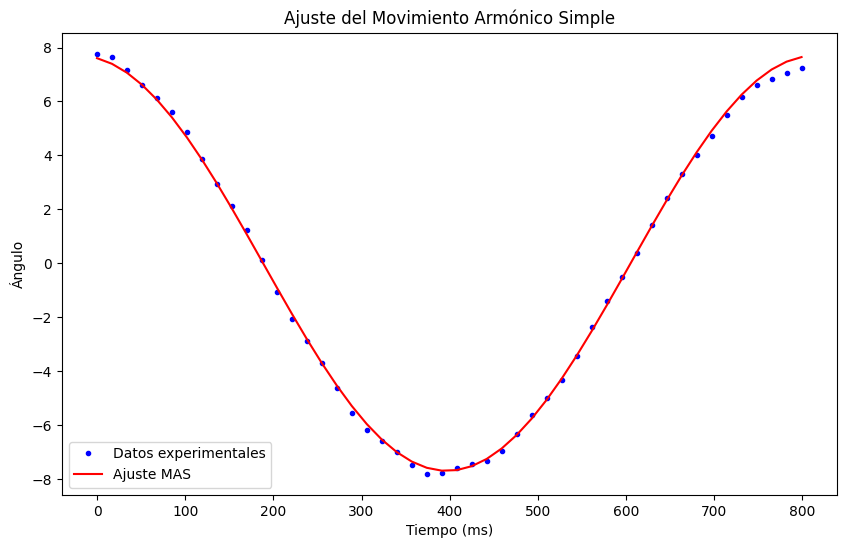

In [58]:
# Graficar los datos y el ajuste
plt.figure(figsize=(10, 6))
plt.plot(tiempo, angulos, 'b.', label='Datos experimentales')
plt.plot(tiempo, modelo_pendulo(tiempo, *popt), 'r-', label='Ajuste MAS')
plt.title('Ajuste del Movimiento Armónico Simple')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo')
plt.legend()
plt.show()